In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Importing Dataset

In [2]:
house_df = pd.read_csv('housing.csv') 
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Preprocessing & Feature extraction 

In [3]:
num_samples = house_df.shape[0]
print("Number of samples:", num_samples)


Number of samples: 20640


In [7]:
import matplotlib.image as mpimg
california_img=mpimg.imread('california_map.png')

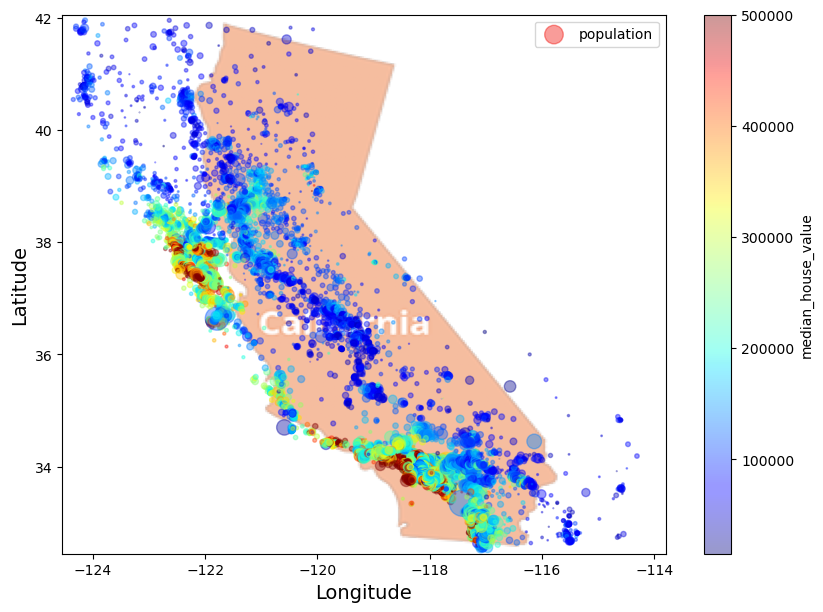

In [8]:
house_df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                s=house_df['population']/100, label='population', figsize=(10,7),
                c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

In [9]:
pd.get_dummies(house_df['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False


In [10]:
house_df.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [11]:
house_df = pd.concat([house_df.drop('ocean_proximity', axis=1), pd.get_dummies(house_df['ocean_proximity'])], axis=1)

In [75]:
house_df.shape

(20433, 14)

In [77]:
X.shape , y.shape

((20433, 13), (20433,))

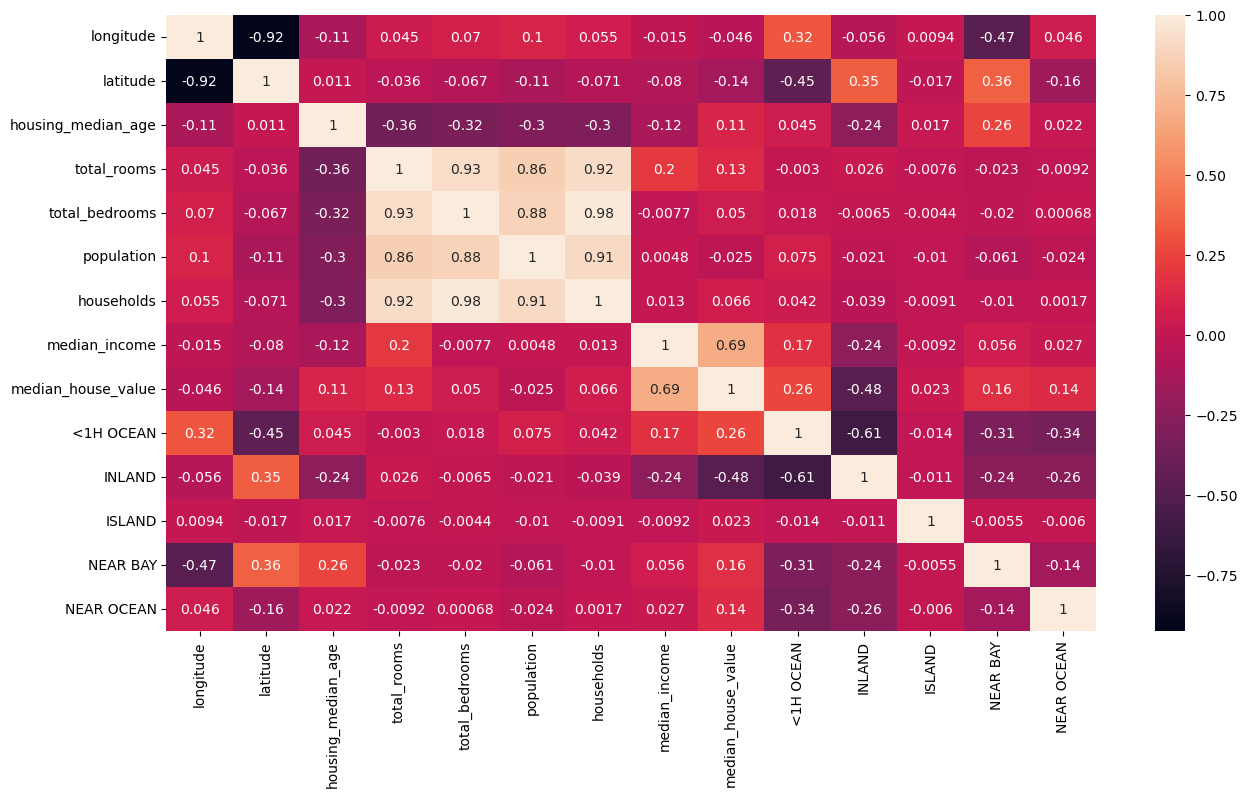

In [13]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(house_df.corr(),annot=True);

# Handling missing data

In [14]:
house_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [15]:
house_df = house_df.dropna()

In [16]:
house_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


# Loading & splitting data

In [39]:
X= house_df.drop(['median_house_value'], axis=1)
y= house_df['median_house_value']

In [18]:
train_data , test_data , val_data = house_df[:18000] , house_df[18000:19500] , house_df[19500:]
len(train_data) ,len(test_data) , len(val_data)

(18000, 1500, 933)

In [19]:
X_train, y_train = train_data.drop('median_house_value', axis=1).to_numpy(), train_data['median_house_value'].to_numpy()
X_val, y_val = val_data.drop('median_house_value', axis=1).to_numpy(), val_data['median_house_value'].to_numpy()
X_test, y_test = test_data.drop('median_house_value', axis=1).to_numpy(), test_data['median_house_value'].to_numpy()


# Scaling

In [20]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.453822,1.204250,0.935040,-0.795703,-0.964371,-0.970876,-0.972988,2.329362,-0.927405,-0.648165,-0.016669,2.792428,-0.382844
1,-1.448767,1.194570,-0.642170,2.018961,1.315597,0.843015,1.637958,2.316883,-0.927405,-0.648165,-0.016669,2.792428,-0.382844
2,-1.458876,1.189729,1.802506,-0.530032,-0.822019,-0.819064,-0.841409,1.769472,-0.927405,-0.648165,-0.016669,2.792428,-0.382844
3,-1.463931,1.189729,1.802506,-0.617382,-0.717005,-0.764970,-0.733049,0.923030,-0.927405,-0.648165,-0.016669,2.792428,-0.382844
4,-1.463931,1.189729,1.802506,-0.457617,-0.611991,-0.758863,-0.629850,-0.019156,-0.927405,-0.648165,-0.016669,2.792428,-0.382844


In [22]:
X_train , X_val , X_test = scaler.transform(X_train) , scaler.transform(X_val) , scaler.transform(X_test)

In [23]:
X_train.shape , X_val.shape , X_test.shape

((18000, 13), (933, 13), (1500, 13))

# Linear Regression Model

In [24]:
reg = LinearRegression()

In [25]:
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
reg.score(X_test_scaled , y_test) 

0.6917297413318726

In [87]:
y_pred =reg.predict(X_test)
linear_df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
linear_df.head(10)

,Y_test,Y_pred
0,335200.0,282708.01
1,349000.0,343008.04
2,346300.0,360238.07
3,323600.0,256380.00
4,368300.0,334117.01
5,337000.0,249188.01
6,239400.0,267439.07
7,256000.0,231147.09
8,284800.0,293917.00
9,325000.0,253992.04


In [28]:
y_pred = reg.predict(X_test_scaled) 

In [29]:
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)
print(f'mean squared error: {mse}')
print(f'r squared: {r2}')

mean squared error: 4029847134.2683406
r squared: 0.6917297413318726


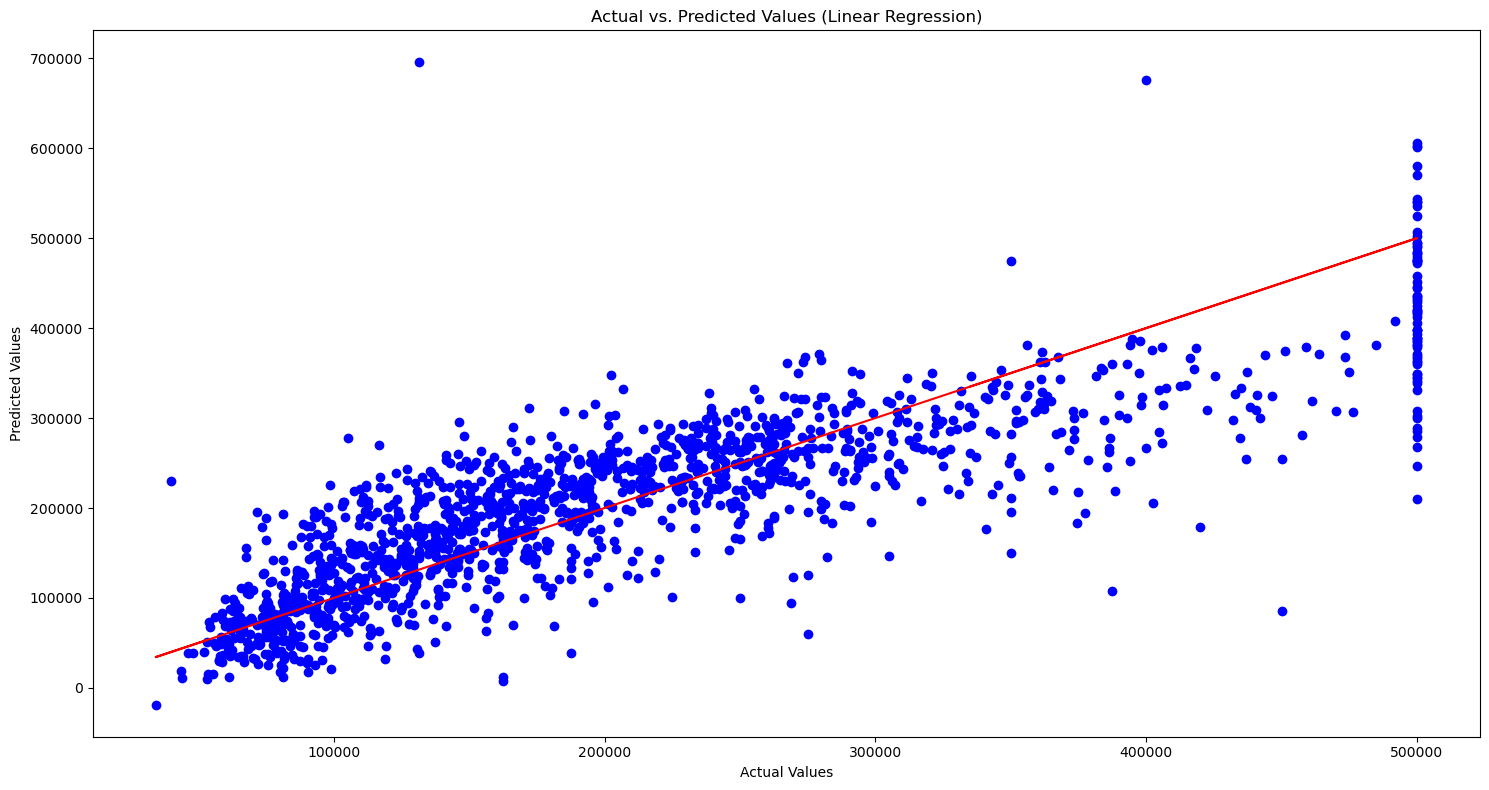

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(15, 8))

# Scatter plot of actual versus predicted values
plt.scatter(y_test, y_pred, color='blue')

# Diagonal line for perfect prediction
plt.plot(y_test, y_test, color='red')

# Title and labels for the plot
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adjust layout and display the plot
plt.tight_layout()
plt.show() 


# KNN Model

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knn = KNeighborsRegressor(n_neighbors=20) 

In [32]:
knn.fit(X_train , y_train)

KNeighborsRegressor(n_neighbors=20)

In [33]:
knn.score(X_test , y_test)

0.6780354235400816

In [34]:
y_pred1 = knn.predict(X_test)
mse = mean_squared_error(y_test , y_pred1)
r2 = r2_score(y_test , y_pred1)
print(f'mean squared error: {mse}')
print(f'r squared: {r2}')

mean squared error: 4208865400.731796
r squared: 0.6780354235400816


In [88]:
y_pred1 =knn.predict(X_test)
knn_df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred1})
knn_df.head(10)

,Y_test,Y_pred
0,335200.0,275368.00
1,349000.0,344316.00
2,346300.0,350896.04
3,323600.0,267488.00
4,368300.0,303992.04
5,337000.0,249744.00
6,239400.0,237520.00
7,256000.0,205492.00
8,284800.0,272688.00
9,325000.0,233416.00


In [55]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:   
    knn = KNeighborsRegressor(n_neighbors=neighbor) 
    knn.fit(X_train, y_train)   
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

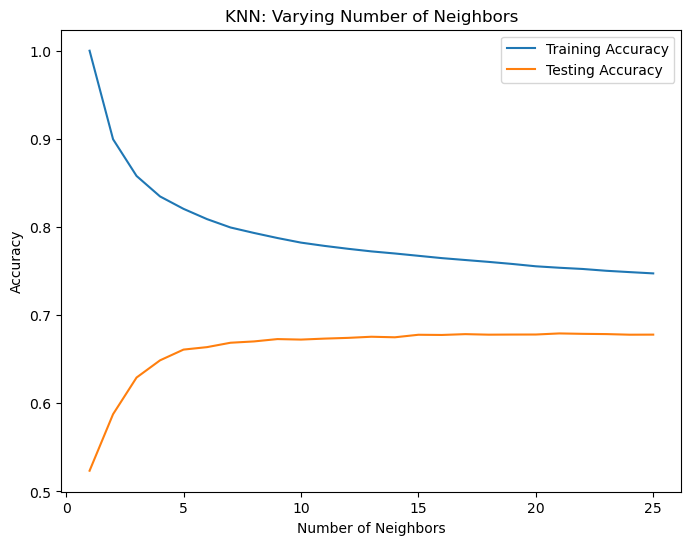

In [56]:
 plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# Cross Validation 

In [40]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [41]:
print(cv_results)

[0.64381504 0.67255902 0.61736146 0.65570895 0.62732687 0.64832179]


# Random Forest Model

In [65]:
forest = RandomForestRegressor()

In [67]:
forest.score(X_test, y_test)

0.7087743925400275

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


reg = RandomForestRegressor()


param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(reg, param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_ 

In [57]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 50}


# Model Visualization

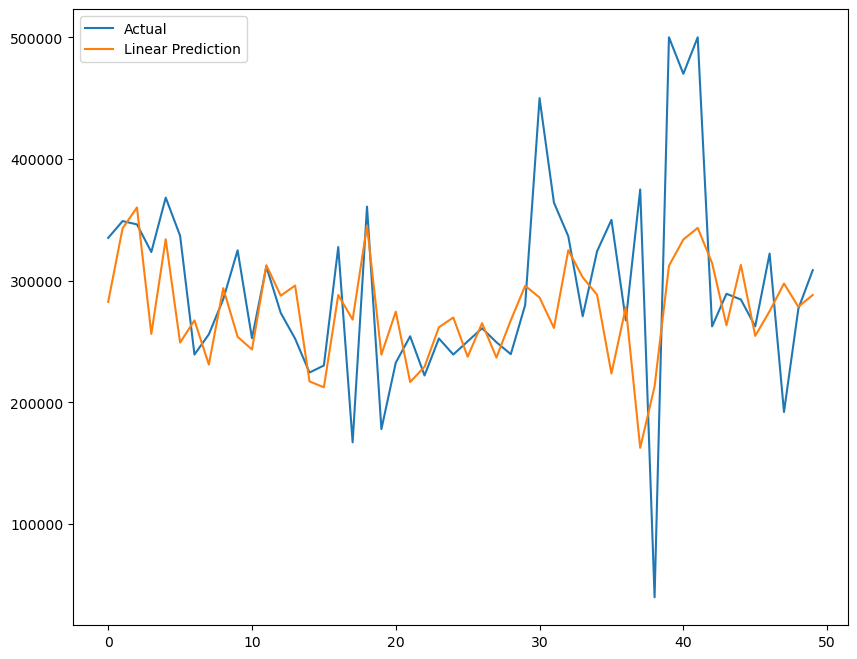

In [90]:
plt.figure(figsize=(10,8))
plt.plot(linear_df[:50])
plt.legend(["Actual" , "Linear Prediction"])

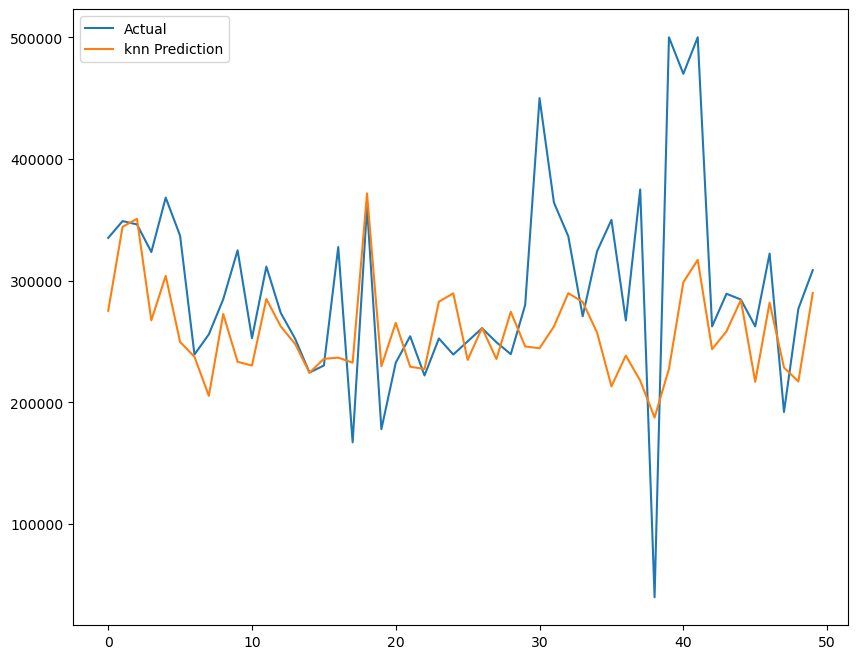

In [91]:
plt.figure(figsize=(10,8))
plt.plot(knn_df[:50])
plt.legend(["Actual" , "knn Prediction"])

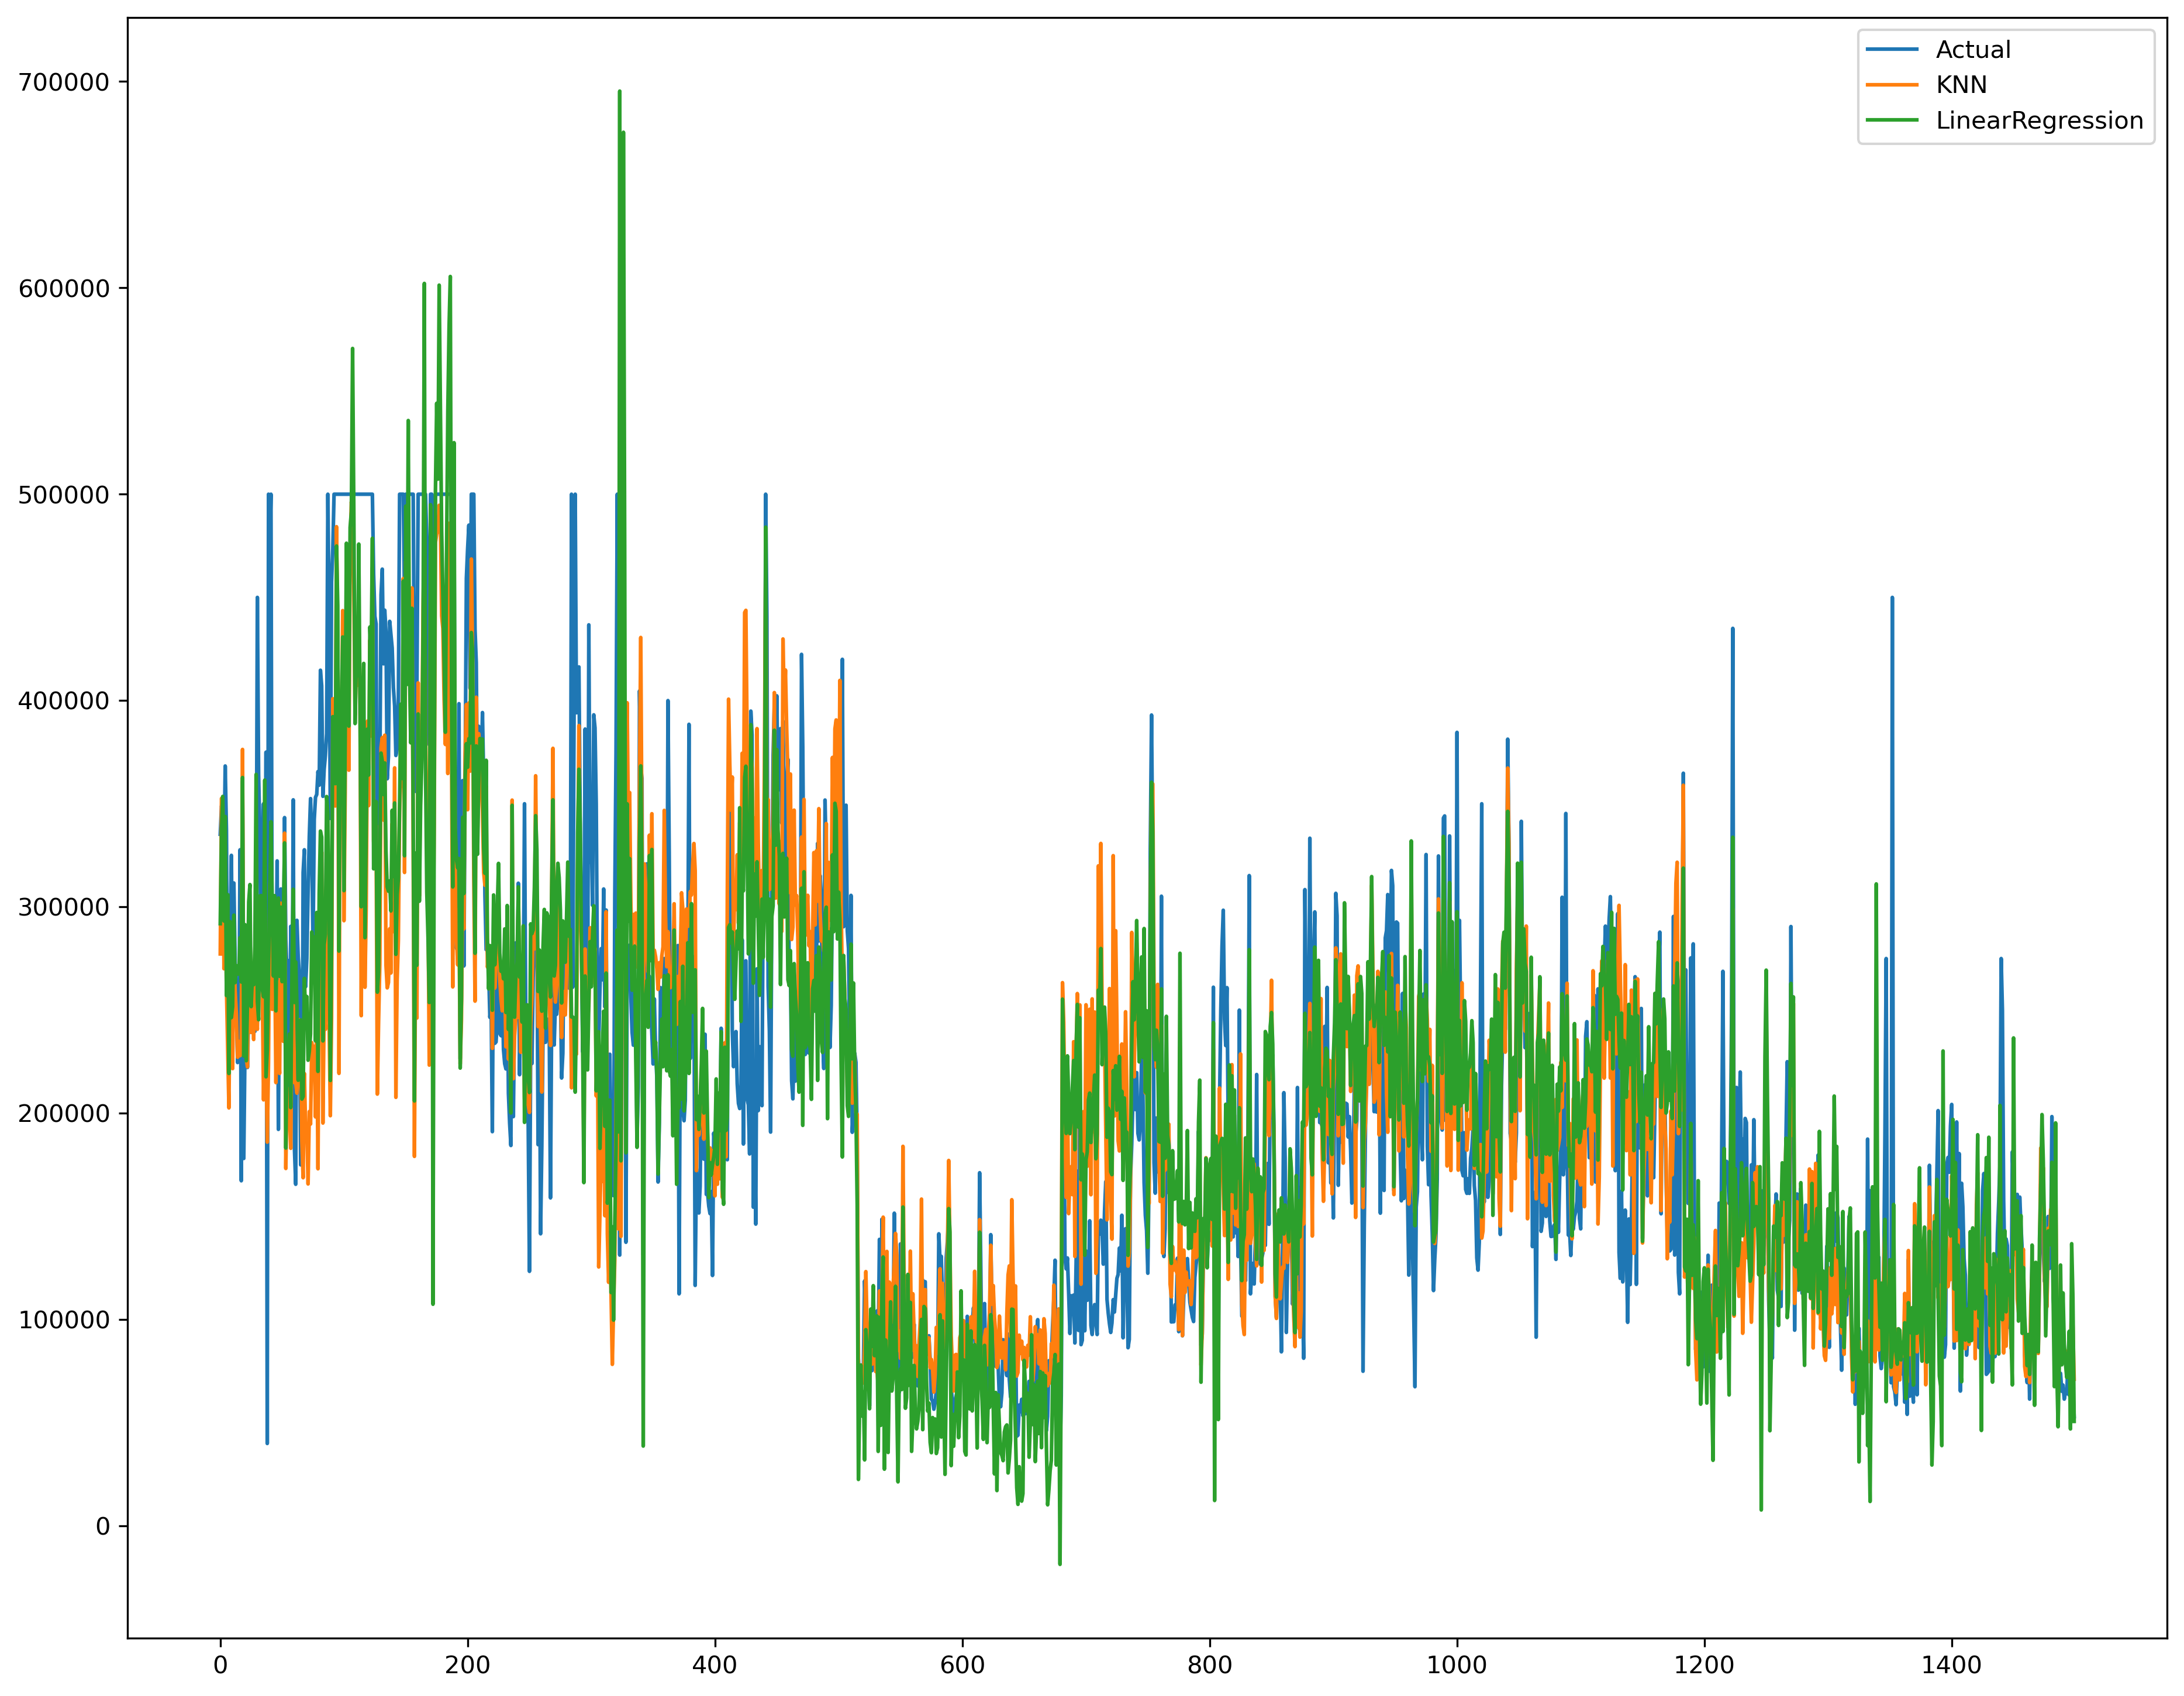

In [83]:
#plt.figure()
plt.figure(figsize=(15, 12), dpi=300)

# Plot the actual values
plt.plot(y_test, label='Actual')

# Plot the predicted values from the first model
plt.plot(y_pred1, label='KNN')

# Plot the predicted values from the second model
plt.plot(y_pred,  label='LinearRegression')

# Add a legend
plt.legend()

# Show the plot
plt.show()

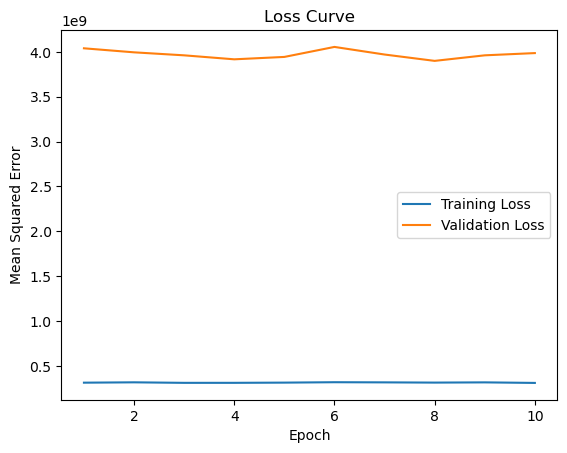

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np



mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Training the model and computing the loss
train_losses = []
val_losses = []
epochs = 10  # Replace with the actual number of epochs

for epoch in range(1, epochs + 1):
    reg.fit(X_train, y_train)  # Fit the model
    y_train_pred = reg.predict(X_train)
    y_val_pred = reg.predict(X_val)

    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_val, y_val_pred)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot the loss curve
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve')
plt.legend()
plt.show()
